# Gradient Decent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

To have an intuitive idea about how Gradient Decent work, Imagine you're at the top of the highest peak in a park. Your friends have dared you to reach the lowest point in the park (assuming their is only one lowest point in whole park) blindfolded from the top. You accepted their challenge and you are ready to begin at the top of the peak. Their are two ways in which you can proceed:

- <b>Naive Way</b>: You start moving in the direction you feel is correct without much thought. You may reach the lowest point, if you are lucky, but their are no guarentees.
- <b>Strategic Way</b>: You hover your feet all around yourself and feel where is the lowest point around you in one step. You take a step in that direction and repeat the process until everything around you feel at the same heighjt and stop at that point. This way you are guarenteed to reach the lowest point.

The second alternative is known as Gredient Decent. The algorithm takes one step at a time in the direction of most negative gradient, the lowest point around current position along the cost function and repeat the process.

## Example
Consider the following function we want to optimize
<br>
<font size="4">
\begin{equation}
y = (x - 3)^2 + 4
\end{equation}
</font>

The gradient of the function at a point $x_0$ is the derivative of the function at $x_0$ that is $y'(x_0)$. The negative of this gradient points in the direction of the lowest point around $x$, the current point.
We use this negative gradient to find out the next lowest point in the direction of minimum, updating $x$ as

<font size="4">
\begin{equation}
x_{n+1} = x_n - \alpha y'(x_n)
\end{equation}
</font>

where $y'(x)$ is defined as, for equation $(1)$
<br><br>
<font size="4">
\begin{equation}
y'(x) = 2(x - 3)
\end{equation}
</font>
<br>
and $\alpha$ is called as `Learning rate`, it signifies how big of a step we want to take in the chosen direction.
<br><br>
Let's first plot the equation and after that we will see how gradient decent tries to find the minimum.

## Importing necessary libraries

- <b>numpy</b> : NumPy is the fundamental package for scientific computing with Python. For all major mathematical computations we afre going to use numpy
<br>
- <b>matplotlib.pyplot</b> : Matplotlib is a Python 2D plotting library.  We are going to use this every now and then to visually plot our data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Equation (1) in code

In [2]:
def func_y(x):
    '''
        Arguments:
        - x :
            point x to find corresponding y
    '''
    return (x - 3) ** 2 + 4

Generating some random points and ploting our function

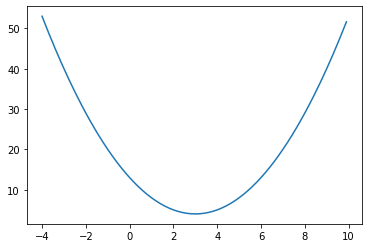

In [3]:
x_values = np.arange(-4, 10, 0.1) #<- equispaces x values between -4 and 10
y_values = func_y(x_values) #<- corresponding y values

plt.plot(x_values, y_values) #<- Plotting our graph

As we see, its a convex function, The amazing property of a convex function is that it only have a global minimum, therefore whenever we reach the minimum, its the lowest we can get for that function.

### Gradient Decent
Let's code the gradient decent function and start optimizing!

In [4]:
def gradient_descent(start_x, learning_rate, epoch):
    '''
        Arguments:
        - start_x : 
            initial position to start optimizing
        - learning_rate :
            Step size
        - epoch:
            Number of itrations to perform
    '''
    
    # Book Keeping gradient values
    x_gd = []
    y_gd = []
    x_gd.append(start_x)
    y_gd.append(func_y(start_x))

    current_x = start_x
    # begin the loops to update x and y
    for i in range(epoch):
        grad = 2 * (current_x - 3)
        next_x = current_x - learning_rate * (grad) #<- Update step
        x_gd.append(next_x)
        y_gd.append(func_y(next_x))

        # update current_x
        current_x = next_x

    return x_gd, y_gd

Let's Start optimizing

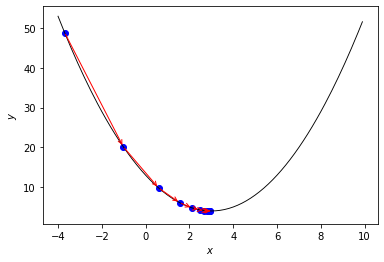

In [5]:
# some Variables you can play with
x0 = -3.7 #<- Initial point
learning_rate = 0.2 #<- Learning rate, play around with its value to see its effect
epoch = 10 #<- Number of iterations

x_gd, y_gd = gradient_descent(x0, learning_rate, epoch) #<- Runing gradient descent

# Plotting results
plt.plot(x_values, y_values, lw = 0.9, color = 'k')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.scatter(x_gd, y_gd, c = 'b')


# Don't worry about this bit, its just beautifying the plot
for i in range(1, epoch+1):
    plt.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')